In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

import matplotlib.animation as animation

from IPython.display import HTML

In [2]:
movies=pd.read_csv('title.basics.tsv.gz',sep='\t',na_values= '\\N', nrows=10000000)

C:\Users\souhail\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
movies=pd.DataFrame(movies)

In [4]:
movies.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear runtimeMinutes                    genres  
0        0     1894.0      NaN              1         Documentary,Short  
1        0     1892.0      NaN              5           Animation,Short  
2        0     1892.0      NaN              4  Animation,Comedy,Romance  
3        0     1892.0      NaN            NaN           Animation,Short  
4        0     1893.0      NaN              1              Comedy,Short

In [5]:
movies=movies[(movies.titleType=='movie')]

In [8]:
Genre=pd.DataFrame(movies['genres'].unique())

In [9]:
Genre

0
0                          Romance
1           Documentary,News,Sport
2                  Biography,Drama
3                               \N
4            Biography,Crime,Drama
...                            ...
1079               Adventure,Music
1080       Animation,Drama,Mystery
1081       Documentary,Music,Sport
1082  Biography,Documentary,Family
1083    Documentary,Horror,Romance

[1084 rows x 1 columns]

In [7]:
movies.genres= movies.apply(lambda x: str(x['genres']).split(',') , axis=1)

In [27]:
movies.head()

tconst titleType                   primaryTitle  \
8    tt0000009     movie                     Miss Jerry   
145  tt0000147     movie  The Corbett-Fitzsimmons Fight   
332  tt0000335     movie          Soldiers of the Cross   
499  tt0000502     movie                       Bohemios   
571  tt0000574     movie    The Story of the Kelly Gang   

                     originalTitle  isAdult startYear endYear runtimeMinutes  \
8                       Miss Jerry        0      1894      \N             45   
145  The Corbett-Fitzsimmons Fight        0      1897      \N             20   
332          Soldiers of the Cross        0      1900      \N             \N   
499                       Bohemios        0      1905      \N            100   
571    The Story of the Kelly Gang        0      1906      \N             70   

                         genres  
8                     [Romance]  
145  [Documentary, News, Sport]  
332          [Biography, Drama]  
499                        [\N]  
571   [Biography, Crime, Drama]

In [8]:
movies=movies.explode('genres')

In [9]:
movies_sh= movies[['tconst','startYear','genres']]

In [10]:
movies_sh=movies_sh.rename({'startYear':'year'},axis=1)

In [20]:
movies_sh=movies_sh.dropna()

In [21]:
year_genre=pd.DataFrame(movies_sh.groupby(['year','genres']).size())

In [22]:
year_genre=year_genre.reset_index()

In [138]:
year_genre.dtypes

year      object
genres    object
0          int64
dtype: object

In [117]:
year_genre.describe()

0
count  3853.000000
mean     90.096289
std     178.293121
min       1.000000
25%       6.000000
50%      27.000000
75%      86.000000
max    1994.000000

In [23]:
year_genre=year_genre.rename({0:'nbr'},axis=1)

In [24]:
current_year=2000
df=year_genre[pd.to_numeric(year_genre.year)==current_year].sort_values(by='nbr',ascending=True)

In [18]:
df.head()

year   genres  nbr
2153  2000.0  Western   11
2133  2000.0    Adult   28
2150  2000.0    Sport   48
2152  2000.0      War   48
2143  2000.0  History   61

<BarContainer object of 23 artists>

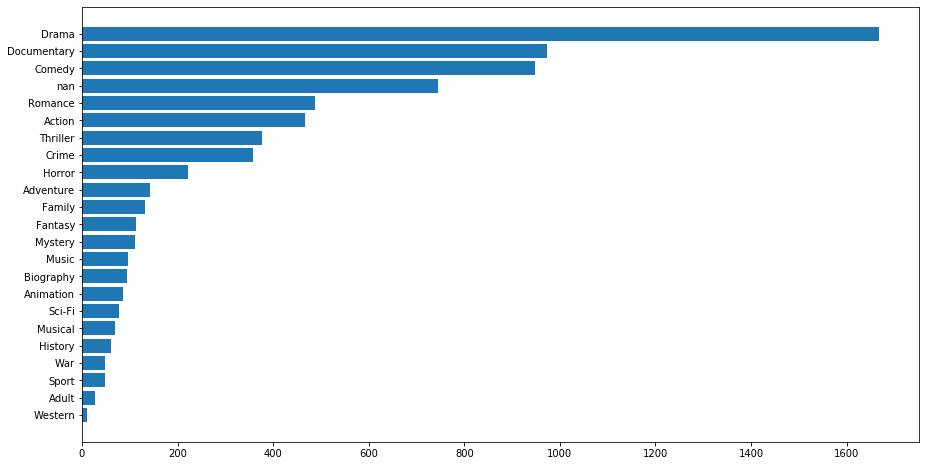

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.barh(df['genres'], df['nbr'])

In [158]:
len(year_genre.genres.unique())

29

In [165]:
colors = dict(zip(df.year.unique(), ['#adb0ff', '#ffb3ff', '#90d595', '#e48381','aafbff', '#f7bb5f', '#eafb50']))
group_lk = df['genres'].to_dict()

Text(1, 0.4, '2000')

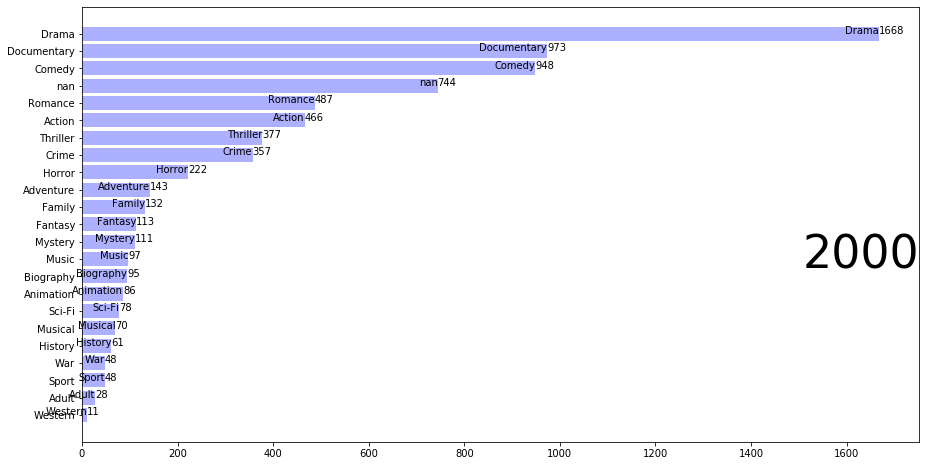

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))

  

# pass colors values to `color=`

ax.barh(df['genres'], df['nbr'], color='#adb0ff')

# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)

for i, (nbr, genres) in enumerate(zip(df['nbr'], df['genres'])):

    ax.text(nbr, i,     genres,            ha='right')  # Tokyo: name

    

    ax.text(nbr, i,     nbr,           ha='left')   # 38194.2: value

# Add year right middle portion of canvas

ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

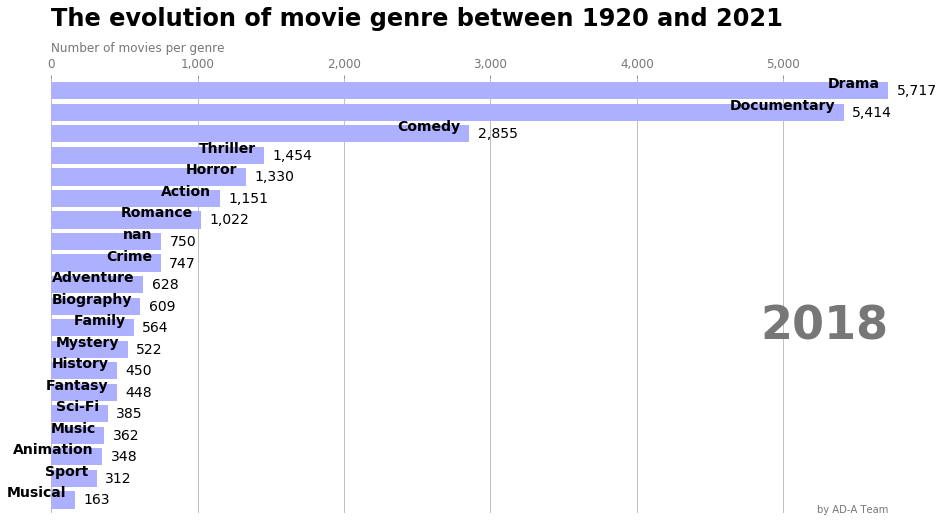

In [32]:

fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):

    df = year_genre[year_genre['year'].eq(year)].sort_values(by='nbr', ascending=True).tail(20)

    ax.clear()

    ax.barh(df['genres'], df['nbr'],color='#adb0ff')

    dx = df['nbr'].max()/100

    for i, (nbr, genre) in enumerate(zip(df['nbr'], df['genres'])):

        ax.text(nbr-dx, i,     genre,           size=14, weight=600, ha='right', va='bottom')
        ax.text(nbr+dx, i,     f'{nbr:,.0f}',  size=14, ha='left',  va='center')

    # ... polished styles

    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)

    ax.text(0, 1.06, 'Number of movies per genre', transform=ax.transAxes, size=12, color='#777777')

    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    ax.xaxis.set_ticks_position('top')

    ax.tick_params(axis='x', colors='#777777', labelsize=12)

    ax.set_yticks([])

    ax.margins(0, 0.01)

    ax.grid(which='major', axis='x', linestyle='-')

    ax.set_axisbelow(True)

    ax.text(0, 1.12, 'The evolution of movie genre between 1920 and 2021',

            transform=ax.transAxes, size=24, weight=600, ha='left')
    
    ax.text(1, 0, 'by AD-A Team', transform=ax.transAxes, ha='right',

            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

    plt.box(False)

    

draw_barchart(2018)

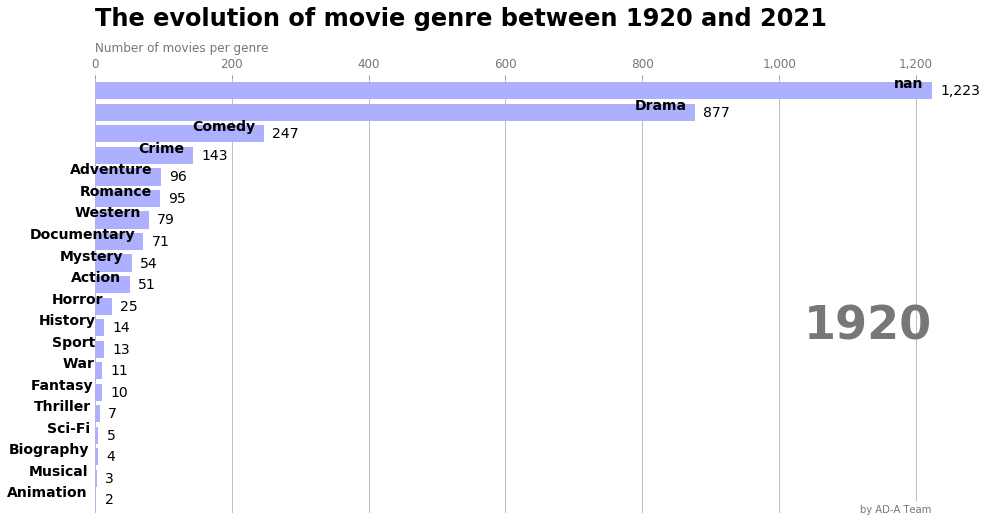

In [33]:
import matplotlib.animation as animation

from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1920, 2019))

HTML(animator.to_jshtml()) 